In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(16)

#Question 1

Designing neural network

In [ ]:
import numpy as np
import itertools

class McCulloch():
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):

        if np.dot(self.weights, x) >= self.threshold:
            return 1
        else:
            return 0

def Area (x, y):
  nerun1 = McCulloch([0, 1], 0)
  nerun2 = McCulloch([-2, 1],-2)
  nerun3 = McCulloch([2, 1, ], 6)
  nerun4 = McCulloch([1, 1, 1], 3)

  z1 = nerun1.model(np.array([x, y]))
  z2 = nerun2.model(np.array([x, y]))
  z3 = nerun3.model(np.array([x, y]))
  z4 = nerun4.model(np.array([z1, 1-z2, 1-z3]))

  # 3 bit output
  # return str(z1) + str(z2)
  return list([z4])


preparing neural network for dataset

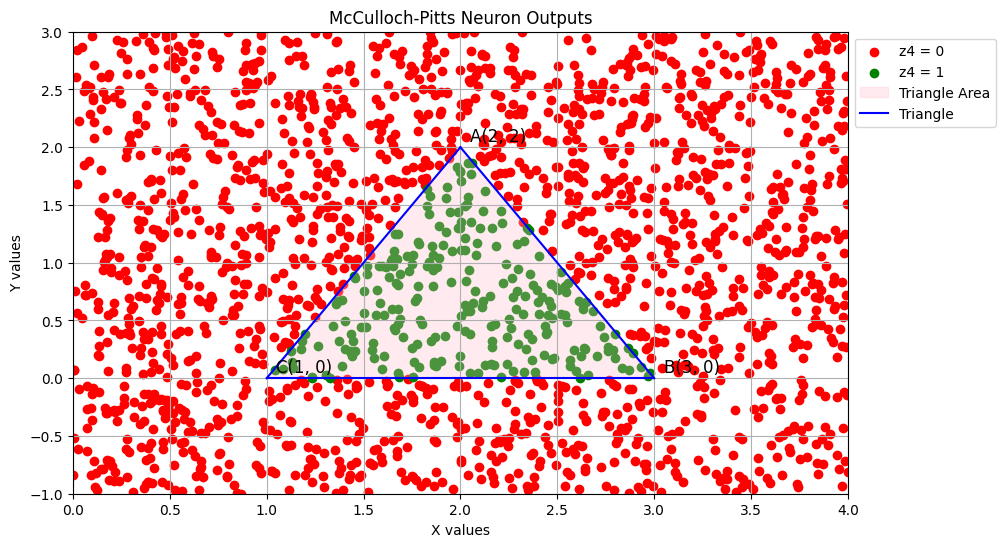

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

plt.figure(figsize=(10, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')


x = np.array([1, 2, 3])
y = np.array([0, 2, 0])

plt.fill(x, y, color='pink', alpha=0.3, label='Triangle Area')
plt.plot([x[0], x[1]], [y[0], y[1]], color='blue', linestyle='-', label='Triangle')
plt.plot([x[1], x[2]], [y[1], y[2]], color='blue', linestyle='-')
plt.plot([x[2], x[0]], [y[2], y[0]], color='blue', linestyle='-')

labels = ['C', 'A', 'B']
for i in range(len(x)):
    plt.text(x[i] + 0.05, y[i] + 0.05, f'{labels[i]}({x[i]}, {y[i]})', fontsize=12, color='black')

plt.grid(True)

plt.xlim(0, 4)
plt.ylim(-1, 3)


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))


plt.savefig('c.png', bbox_inches='tight')
plt.show()


#Question2

importing dataset

In [ ]:
import io
import gdown
import scipy.io

file_id = "1rMaDhSCUwK_rpMpV1cQOnvXOuvNrH2m5"


gdown.download(f"https://drive.google.com/uc?id={file_id}", "weather_prediction_dataset.csv", quiet=False)


df = pd.read_csv("weather_prediction_dataset.csv")

Downloading...
From: https://drive.google.com/uc?id=1rMaDhSCUwK_rpMpV1cQOnvXOuvNrH2m5
To: /content/weather_prediction_dataset.csv
100%|██████████| 2.77M/2.77M [00:00<00:00, 35.6MB/s]


Choosing France cities

In [ ]:
#MONTELIMAR-PERPIGNAN-TOURS are in french
Cl_name = df.columns

#MONTELIMAR indexes
M1 = df.columns.get_loc('MONTELIMAR_wind_speed')
M2 = df.columns.get_loc('MONTELIMAR_temp_max')

#PERPIGNAN
P1 = df.columns.get_loc('PERPIGNAN_wind_speed')
P2 = df.columns.get_loc('PERPIGNAN_temp_max')

#TOURS
T1 = df.columns.get_loc('TOURS_wind_speed')
T2 = df.columns.get_loc('TOURS_temp_max')

#BASEL
B1 = df.columns.get_loc('BASEL_cloud_cover')
B2 = df.columns.get_loc('BASEL_temp_max')

#Choosing TOURS data
F_Data = df.iloc[:,list(range(0,2))+list(range(T1, T2+1)) + list(range(T1, T2+1)) + list(range(T1, T2+1)) + list(range(T1, T2+1))]
F_Data.head()

,DATE,MONTH,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,...,TOURS_temp_min,TOURS_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8,...,7.2,9.8,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2,...,6.6,9.2,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6,...,6.6,9.6,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8,...,6.4,10.8,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5,...,6.4,9.5,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


Preprocessing dataset

In [ ]:
F_Data = F_Data.to_numpy()
minmax = MinMaxScaler()
F_Data_norm = minmax.fit_transform(F_Data[:,2:])

Creating Dataset

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=16)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)

Shallow neural network

<ipython-input-65-98ff0f55b2ba>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-65-98ff0f55b2ba>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
<ipython-input-65-98ff0f55b2ba>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-65-98ff0f55b2ba>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or s

Epoch [5/200], Train Loss: 0.3449, Val Loss: 0.3355
Epoch [10/200], Train Loss: 0.3441, Val Loss: 0.3347
Epoch [15/200], Train Loss: 0.3433, Val Loss: 0.3340
Epoch [20/200], Train Loss: 0.3425, Val Loss: 0.3332
Epoch [25/200], Train Loss: 0.3418, Val Loss: 0.3324


Training Epochs:  21%|█████████▏                                  | 42/200 [00:00<00:01, 105.83it/s]

Epoch [30/200], Train Loss: 0.3410, Val Loss: 0.3317
Epoch [35/200], Train Loss: 0.3402, Val Loss: 0.3309
Epoch [40/200], Train Loss: 0.3395, Val Loss: 0.3302
Epoch [45/200], Train Loss: 0.3387, Val Loss: 0.3294
Epoch [50/200], Train Loss: 0.3379, Val Loss: 0.3287


Training Epochs:  38%|████████████████▌                           | 75/200 [00:00<00:01, 106.58it/s]

Epoch [55/200], Train Loss: 0.3372, Val Loss: 0.3280
Epoch [60/200], Train Loss: 0.3364, Val Loss: 0.3272
Epoch [65/200], Train Loss: 0.3357, Val Loss: 0.3265
Epoch [70/200], Train Loss: 0.3349, Val Loss: 0.3258
Epoch [75/200], Train Loss: 0.3342, Val Loss: 0.3250


Training Epochs:  48%|█████████████████████▎                      | 97/200 [00:00<00:00, 105.90it/s]

Epoch [80/200], Train Loss: 0.3334, Val Loss: 0.3243
Epoch [85/200], Train Loss: 0.3327, Val Loss: 0.3236
Epoch [90/200], Train Loss: 0.3319, Val Loss: 0.3228
Epoch [95/200], Train Loss: 0.3312, Val Loss: 0.3221
Epoch [100/200], Train Loss: 0.3304, Val Loss: 0.3214


Training Epochs:  60%|█████████████████████████▌                 | 119/200 [00:01<00:00, 102.07it/s]

Epoch [105/200], Train Loss: 0.3297, Val Loss: 0.3207
Epoch [110/200], Train Loss: 0.3290, Val Loss: 0.3200
Epoch [115/200], Train Loss: 0.3282, Val Loss: 0.3193
Epoch [120/200], Train Loss: 0.3275, Val Loss: 0.3186


Training Epochs:  65%|████████████████████████████▌               | 130/200 [00:01<00:00, 91.01it/s]

Epoch [125/200], Train Loss: 0.3268, Val Loss: 0.3178
Epoch [130/200], Train Loss: 0.3261, Val Loss: 0.3171
Epoch [135/200], Train Loss: 0.3253, Val Loss: 0.3164


Training Epochs:  74%|████████████████████████████████▊           | 149/200 [00:01<00:00, 78.73it/s]

Epoch [140/200], Train Loss: 0.3246, Val Loss: 0.3157
Epoch [145/200], Train Loss: 0.3239, Val Loss: 0.3150
Epoch [150/200], Train Loss: 0.3232, Val Loss: 0.3143


Training Epochs:  83%|████████████████████████████████████▌       | 166/200 [00:01<00:00, 70.41it/s]

Epoch [155/200], Train Loss: 0.3225, Val Loss: 0.3136
Epoch [160/200], Train Loss: 0.3217, Val Loss: 0.3129
Epoch [165/200], Train Loss: 0.3210, Val Loss: 0.3122


Training Epochs:  91%|████████████████████████████████████████    | 182/200 [00:02<00:00, 69.33it/s]

Epoch [170/200], Train Loss: 0.3203, Val Loss: 0.3115
Epoch [175/200], Train Loss: 0.3196, Val Loss: 0.3108
Epoch [180/200], Train Loss: 0.3189, Val Loss: 0.3101


Training Epochs:  98%|███████████████████████████████████████████▎| 197/200 [00:02<00:00, 66.08it/s]

Epoch [185/200], Train Loss: 0.3182, Val Loss: 0.3094
Epoch [190/200], Train Loss: 0.3175, Val Loss: 0.3087
Epoch [195/200], Train Loss: 0.3167, Val Loss: 0.3080


Training Epochs: 100%|████████████████████████████████████████████| 200/200 [00:02<00:00, 84.55it/s]


Epoch [200/200], Train Loss: 0.3160, Val Loss: 0.3073


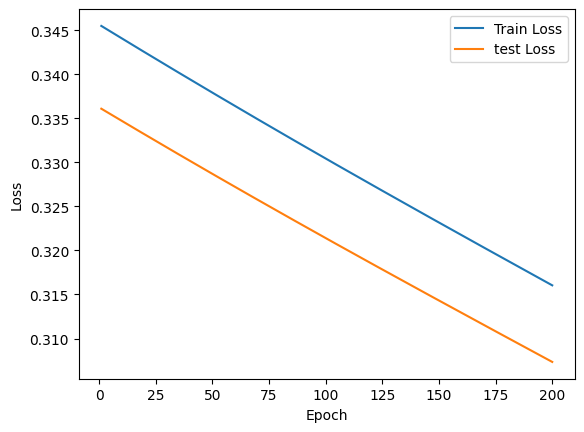

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm


X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
#X_val = torch.tensor(X_val, dtype=torch.float32)
#Y_val = torch.tensor(Y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)

    def forward(self, x):
        x = x.view(-1, 3*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#learning_rate = 1
learning_rate = 0.001
#learning_rate = 0.00000001

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 200
train_losses = []
test_losses = []

for epoch in tqdm(range(num_epochs), desc="Training Epochs", ncols=100):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_losses.append(test_loss.item())


    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {test_loss.item():.4f}')


plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

predictions = model(X_test)
Y_pred = predictions.detach().numpy()
Y_test_np = Y_test.numpy()

mse = mean_squared_error(Y_test_np, Y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(Y_test_np, Y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 0.010988743975758553
Root Mean Squared Error (RMSE): 0.10482721009241137
Mean Absolute Error (MAE): 0.07585974782705307


Deep neural network

<ipython-input-50-3c50c082bc1c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-50-3c50c082bc1c>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
<ipython-input-50-3c50c082bc1c>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-50-3c50c082bc1c>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

Epoch [5/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:   8%|███▍                                         | 15/200 [00:00<00:07, 24.35it/s]

Epoch [10/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [15/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  12%|█████▍                                       | 24/200 [00:00<00:07, 25.02it/s]

Epoch [20/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [25/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  16%|███████▍                                     | 33/200 [00:01<00:06, 26.27it/s]

Epoch [30/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  18%|████████                                     | 36/200 [00:01<00:07, 23.11it/s]

Epoch [35/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  21%|█████████▍                                   | 42/200 [00:01<00:08, 19.34it/s]

Epoch [40/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  24%|██████████▌                                  | 47/200 [00:02<00:08, 17.87it/s]

Epoch [45/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  26%|███████████▉                                 | 53/200 [00:02<00:08, 16.87it/s]

Epoch [50/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  28%|████████████▊                                | 57/200 [00:02<00:08, 16.53it/s]

Epoch [55/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  32%|██████████████▏                              | 63/200 [00:03<00:08, 16.50it/s]

Epoch [60/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  34%|███████████████                              | 67/200 [00:03<00:08, 16.38it/s]

Epoch [65/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  36%|████████████████▍                            | 73/200 [00:03<00:07, 16.71it/s]

Epoch [70/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  38%|█████████████████▎                           | 77/200 [00:03<00:07, 17.01it/s]

Epoch [75/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  42%|███████████████████▏                         | 85/200 [00:04<00:05, 22.31it/s]

Epoch [80/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [85/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  47%|█████████████████████▏                       | 94/200 [00:04<00:04, 25.02it/s]

Epoch [90/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [95/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  52%|██████████████████████▋                     | 103/200 [00:04<00:03, 26.15it/s]

Epoch [100/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [105/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  57%|█████████████████████████▎                  | 115/200 [00:05<00:03, 26.24it/s]

Epoch [110/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [115/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  62%|███████████████████████████▎                | 124/200 [00:05<00:02, 26.41it/s]

Epoch [120/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [125/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  66%|█████████████████████████████▎              | 133/200 [00:06<00:02, 25.95it/s]

Epoch [130/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [135/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  72%|███████████████████████████████▉            | 145/200 [00:06<00:02, 25.95it/s]

Epoch [140/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [145/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  77%|█████████████████████████████████▉          | 154/200 [00:06<00:01, 26.48it/s]

Epoch [150/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [155/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  82%|███████████████████████████████████▊        | 163/200 [00:07<00:01, 26.00it/s]

Epoch [160/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [165/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  88%|██████████████████████████████████████▌     | 175/200 [00:07<00:00, 26.15it/s]

Epoch [170/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [175/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  92%|████████████████████████████████████████▍   | 184/200 [00:08<00:00, 26.21it/s]

Epoch [180/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [185/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs:  96%|██████████████████████████████████████████▍ | 193/200 [00:08<00:00, 26.18it/s]

Epoch [190/200], Train Loss: 0.3372, Val Loss: 0.3288
Epoch [195/200], Train Loss: 0.3372, Val Loss: 0.3288


Training Epochs: 100%|████████████████████████████████████████████| 200/200 [00:08<00:00, 23.02it/s]


Epoch [200/200], Train Loss: 0.3372, Val Loss: 0.3288


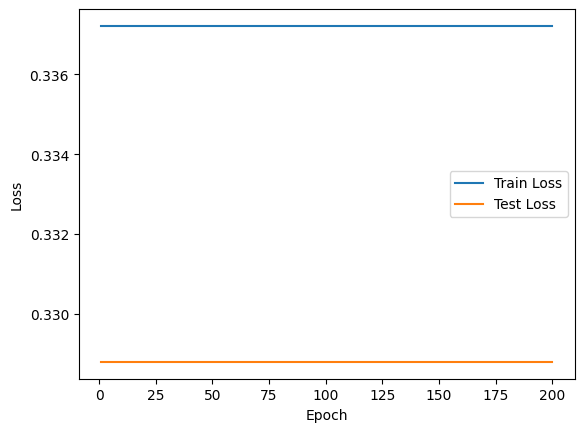

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm


X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
#X_val   = torch.tensor(X_val, dtype=torch.float32)
#Y_val   = torch.tensor(Y_val, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
Y_test  = torch.tensor(Y_test, dtype=torch.float32)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 64)
        self.fc6 = nn.Linear(64, 32)

    def forward(self, x):
        x = x.view(-1, 3*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

#learning_rate = 1
#learning_rate = 0.001
learning_rate = 0.00000001

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 200
train_losses = []
test_losses = []

for epoch in tqdm(range(num_epochs), desc="Training Epochs", ncols=100):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {test_loss.item():.4f}')


plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

predictions = model(X_test)
Y_pred = predictions.detach().numpy()
Y_test_np = Y_test.numpy()

mse = mean_squared_error(Y_test_np, Y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(Y_test_np, Y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 0.3287966251373291
Root Mean Squared Error (RMSE): 0.5734079046693803
Mean Absolute Error (MAE): 0.48925310373306274


Final review

<ipython-input-84-0bae87960196>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-84-0bae87960196>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
<ipython-input-84-0bae87960196>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-84-0bae87960196>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or s

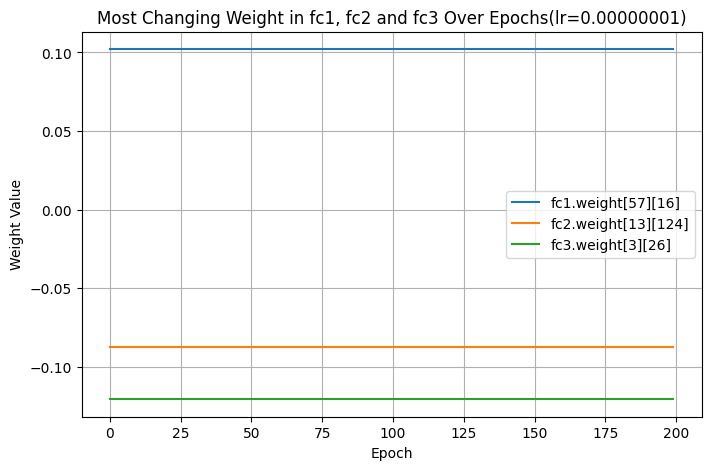

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)

    def forward(self, x):
        x = x.view(-1, 3*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)


#learning_rate = 1
#learning_rate = 0.001
learning_rate = 0.00000001
num_epochs = 200

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
test_losses = []


fc1_weight_history = []
fc2_weight_history = []
fc3_weight_history = []


for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_output = model(X_test)
        test_loss = criterion(test_output, Y_test)
        test_losses.append(test_loss.item())

    fc1_weight_history.append(model.fc1.weight.data.clone().cpu().numpy())
    fc2_weight_history.append(model.fc2.weight.data.clone().cpu().numpy())
    fc3_weight_history.append(model.fc3.weight.data.clone().cpu().numpy())


fc1_weight_history = np.array(fc1_weight_history)
fc2_weight_history = np.array(fc2_weight_history)
fc3_weight_history = np.array(fc3_weight_history)

weight_std1 = np.std(fc1_weight_history, axis=0)
weight_std2 = np.std(fc2_weight_history, axis=0)
weight_std3 = np.std(fc3_weight_history, axis=0)


max_change_idx1 = np.unravel_index(np.argmax(weight_std1), weight_std1.shape)
max_change_idx2 = np.unravel_index(np.argmax(weight_std2), weight_std2.shape)
max_change_idx3 = np.unravel_index(np.argmax(weight_std3), weight_std3.shape)

i1, j1 = max_change_idx1
i2, j2 = max_change_idx2
i3, j3 = max_change_idx3


selected_weight_values1 = fc1_weight_history[:, i1, j1]
selected_weight_values2 = fc2_weight_history[:, i2, j2]
selected_weight_values3 = fc3_weight_history[:, i3, j3]



plt.figure(figsize=(8, 5))
plt.plot(selected_weight_values1, label=f'fc1.weight[{i1}][{j1}]')
plt.plot(selected_weight_values2, label=f'fc2.weight[{i2}][{j2}]')
plt.plot(selected_weight_values3, label=f'fc3.weight[{i3}][{j3}]')


plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Most Changing Weight in fc1, fc2 and fc3 Over Epochs(lr=0.00000001)')
plt.grid(True)
plt.legend()
plt.show()


#Question3

Creat Enviroment

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
random.seed(16)
np.random.seed(16)

class WumpusWorld:
    def __init__(self, size=4):
        self.size = size
        self.grid = np.zeros((size, size))
        self.agent_pos = (0, 0)
        self.gold_pos = (random.randint(0, size-1), random.randint(0, size-1))
        self.pits = [(random.randint(0, size-1), random.randint(0, size-1)) for _ in range(3)]
        self.wumpus_pos = (random.randint(0, size-1), random.randint(0, size-1))

        self.grid[self.gold_pos] = 1
        for pit in self.pits:
            self.grid[pit] = -1
        self.grid[self.wumpus_pos] = -2


        self.rewards = {
            "move": -1,
            "gold": 100,
            "pit": -1000,
            "wumpus": -1000,
            "kill_wumpus": 50
        }

    def reset(self):
        self.agent_pos = (0, 0)
        return self.agent_pos

    def get_state(self):
        return self.agent_pos

    def get_reward(self, action):
        if action == 'UP':
            new_pos = (self.agent_pos[0] - 1, self.agent_pos[1])
        elif action == 'DOWN':
            new_pos = (self.agent_pos[0] + 1, self.agent_pos[1])
        elif action == 'LEFT':
            new_pos = (self.agent_pos[0], self.agent_pos[1] - 1)
        elif action == 'RIGHT':
            new_pos = (self.agent_pos[0], self.agent_pos[1] + 1)

        if not (0 <= new_pos[0] < self.size and 0 <= new_pos[1] < self.size):
            return self.rewards["move"], self.agent_pos


        self.agent_pos = new_pos

        if self.agent_pos == self.gold_pos:
            return self.rewards["gold"], self.agent_pos
        elif self.agent_pos in self.pits:
            return self.rewards["pit"], self.agent_pos
        elif self.agent_pos == self.wumpus_pos:
            return self.rewards["wumpus"], self.agent_pos
        else:
            return self.rewards["move"], self.agent_pos

    def possible_actions(self):
        return ['UP', 'DOWN', 'LEFT', 'RIGHT']

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
random.seed(16)
np.random.seed(16)

class WumpusWorld:
    def __init__(self, size=4):
        self.size = size
        self.grid = np.zeros((size, size))
        self.agent_pos = (0, 0)


        while True:
            self.gold_pos = (random.randint(0, size-1), random.randint(0, size-1))
            self.wumpus_pos = (random.randint(0, size-1), random.randint(0, size-1))
            self.pits = []
            while len(self.pits) < 3:
                pit = (random.randint(0, size-1), random.randint(0, size-1))
                if pit not in self.pits and pit != self.gold_pos and pit != self.wumpus_pos:
                    self.pits.append(pit)

            if self.gold_pos != (0, 0) and self.wumpus_pos != (0, 0) and all(p != (0, 0) for p in self.pits):
                break

        self.grid[self.gold_pos] = 1
        for pit in self.pits:
            self.grid[pit] = -1
        self.grid[self.wumpus_pos] = -2

        self.rewards = {
            "move": -1,
            "gold": 100,
            "pit": -1000,
            "wumpus": -1000
        }

    def reset(self):
        self.agent_pos = (0, 0)
        return self.agent_pos

    def get_state(self):
        return self.agent_pos

    def get_reward(self, action):
        if action == 'UP':
            new_pos = (self.agent_pos[0] - 1, self.agent_pos[1])
        elif action == 'DOWN':
            new_pos = (self.agent_pos[0] + 1, self.agent_pos[1])
        elif action == 'LEFT':
            new_pos = (self.agent_pos[0], self.agent_pos[1] - 1)
        elif action == 'RIGHT':
            new_pos = (self.agent_pos[0], self.agent_pos[1] + 1)
        else:
            return self.rewards["move"], self.agent_pos, False

        if not (0 <= new_pos[0] < self.size and 0 <= new_pos[1] < self.size):
            return self.rewards["move"], self.agent_pos, False

        self.agent_pos = new_pos

        if self.agent_pos == self.gold_pos:
            return self.rewards["gold"], self.agent_pos, True
        elif self.agent_pos in self.pits:
            return self.rewards["pit"], self.agent_pos, True
        elif self.agent_pos == self.wumpus_pos:
            return self.rewards["wumpus"], self.agent_pos, True
        else:
            return self.rewards["move"], self.agent_pos, False

    def possible_actions(self):
        return ['UP', 'DOWN', 'LEFT', 'RIGHT']


Q-Learning

In [ ]:
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.q_table = defaultdict(lambda: np.zeros(len(env.possible_actions())))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.actions = env.possible_actions()

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)
        else:
            return self.actions[np.argmax(self.q_table[state])]

    def update_q_table(self, state, action, reward, next_state):
        action_index = self.actions.index(action)
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        self.q_table[state][action_index] += self.learning_rate * (td_target - self.q_table[state][action_index])

    def train(self, num_episodes):
        qlearning_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            steps = 0
            max_steps = 100

            while not done and steps < max_steps:
                action = self.choose_action(state)
                reward, next_state, done = self.env.get_reward(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1

            qlearning_rewards.append(total_reward)
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")


            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return qlearning_rewards

env = WumpusWorld()
agent = QLearningAgent(env)
qlearning_rewards = agent.train(1000)


Episode 1: Total Reward: -1022
Episode 2: Total Reward: 93
Episode 3: Total Reward: -1003
Episode 4: Total Reward: 91
Episode 5: Total Reward: 95
Episode 6: Total Reward: 84
Episode 7: Total Reward: 96
Episode 8: Total Reward: -1001
Episode 9: Total Reward: 95
Episode 10: Total Reward: 94
Episode 11: Total Reward: 97
Episode 12: Total Reward: 97
Episode 13: Total Reward: 96
Episode 14: Total Reward: 97
Episode 15: Total Reward: 93
Episode 16: Total Reward: 97
Episode 17: Total Reward: 96
Episode 18: Total Reward: 97
Episode 19: Total Reward: -1006
Episode 20: Total Reward: 97
Episode 21: Total Reward: 97
Episode 22: Total Reward: 97
Episode 23: Total Reward: 97
Episode 24: Total Reward: 97
Episode 25: Total Reward: 97
Episode 26: Total Reward: 97
Episode 27: Total Reward: 95
Episode 28: Total Reward: 96
Episode 29: Total Reward: 97
Episode 30: Total Reward: 97
Episode 31: Total Reward: 97
Episode 32: Total Reward: 97
Episode 33: Total Reward: 97
Episode 34: Total Reward: 97
Episode 35:

Deep Q-Learning

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

random.seed(16)
torch.manual_seed(16)

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 32)
        self.output = nn.Linear(32, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        return self.output(x)


class DQNAgent:
    def __init__(self, env, epsilon=1.0, learning_rate=0.001, gamma=0.9, batch_size=128, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.batch_size = batch_size
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.actions = env.possible_actions()
        self.action_size = len(self.actions)

        self.model = DQN(state_size=2, action_size=self.action_size)
        self.target_model = DQN(state_size=2, action_size=self.action_size)
        self.target_model.load_state_dict(self.model.state_dict())

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.memory = deque(maxlen=10000)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)
        state_tensor = torch.tensor(state, dtype=torch.float32)
        q_values = self.model(state_tensor)
        return self.actions[torch.argmax(q_values).item()]

    def store_experience(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def sample_batch(self):
        return random.sample(self.memory, self.batch_size) if len(self.memory) > self.batch_size else None

    def train(self, num_episodes):
        cumulative_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            steps = 0
            max_steps = 100

            while not done and steps < max_steps:
                action = self.choose_action(state)
                reward, next_state, done = self.env.get_reward(action)
                self.store_experience(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
                steps += 1

                if len(self.memory) > self.batch_size:
                    batch = self.sample_batch()
                    self.optimize_model(batch)

            cumulative_rewards.append(total_reward)
            print(f"Episode {episode+1}: Total Reward: {total_reward}")

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

            if episode % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())

        return cumulative_rewards

    def optimize_model(self, batch):
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        q_values = self.model(states)
        next_q_values = self.target_model(next_states)

        targets = q_values.clone()
        for i, action in enumerate(actions):
            action_idx = self.actions.index(action)
            max_next_q = torch.max(next_q_values[i])
            targets[i][action_idx] = rewards[i] if dones[i] else rewards[i] + self.gamma * max_next_q

        loss = nn.MSELoss()(q_values, targets.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
env = WumpusWorld()
agent = DQNAgent(env)
dqn_rewards = agent.train(1000)

Episode 1: Total Reward: -1005
Episode 2: Total Reward: -1011
Episode 3: Total Reward: -1008
Episode 4: Total Reward: -1019
Episode 5: Total Reward: -1001
Episode 6: Total Reward: -1013
Episode 7: Total Reward: -1008
Episode 8: Total Reward: -1001
Episode 9: Total Reward: -1010
Episode 10: Total Reward: -1006
Episode 11: Total Reward: -1007
Episode 12: Total Reward: -1001
Episode 13: Total Reward: -1008
Episode 14: Total Reward: -1006
Episode 15: Total Reward: -1001
Episode 16: Total Reward: -1006
Episode 17: Total Reward: -1001
Episode 18: Total Reward: -1006
Episode 19: Total Reward: -1005
Episode 20: Total Reward: -1009
Episode 21: Total Reward: -1004
Episode 22: Total Reward: -1005
Episode 23: Total Reward: -1002
Episode 24: Total Reward: -1006
Episode 25: Total Reward: -1003
Episode 26: Total Reward: -1008
Episode 27: Total Reward: -1001
Episode 28: Total Reward: -1007
Episode 29: Total Reward: -1001
Episode 30: Total Reward: -1001
Episode 31: Total Reward: -1009
Episode 32: Total

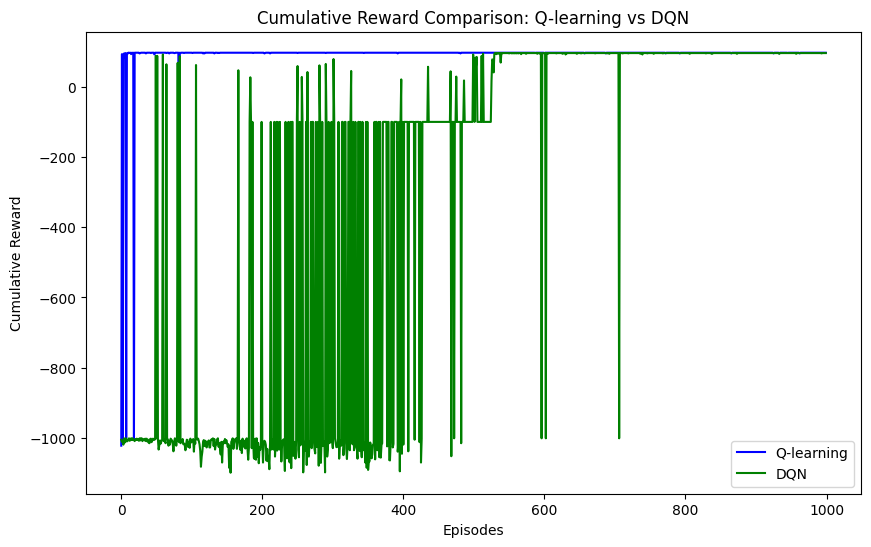

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


qlearning_rewards = np.array(qlearning_rewards)
dqn_rewards = np.array(dqn_rewards)


plt.figure(figsize=(10, 6))


plt.plot(qlearning_rewards, label='Q-learning', color='blue')
plt.plot(dqn_rewards, label='DQN', color='green')


plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Cumulative Reward Comparison: Q-learning vs DQN')

plt.show()


Mean of rewards

In [ ]:
q_avg = np.mean(qlearning_rewards)
dqn_avg = np.mean(dqn_rewards)

print("Average reward over 1000 episodes:")
print(f"Q-Learning: {q_avg:.2f}")
print(f"DQN: {dqn_avg:.2f}")

Average reward over 1000 episodes:
Q-Learning: 91.38
DQN: -305.07
